<a href="https://colab.research.google.com/github/KHRMNKY/Notebooks/blob/main/image_classification_using_CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [38]:
batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [11]:
img, label= trainset[0]
img.shape, img

(torch.Size([3, 32, 32]),
 tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0

(torch.Size([3, 32, 32]),
 tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0

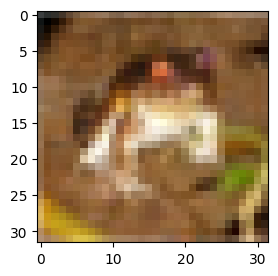

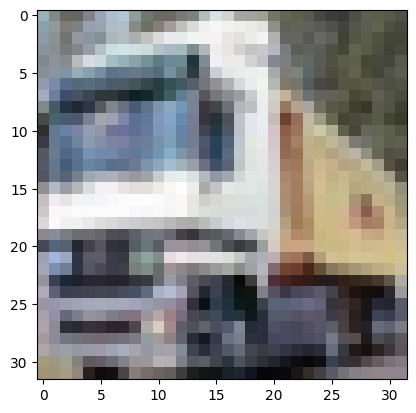

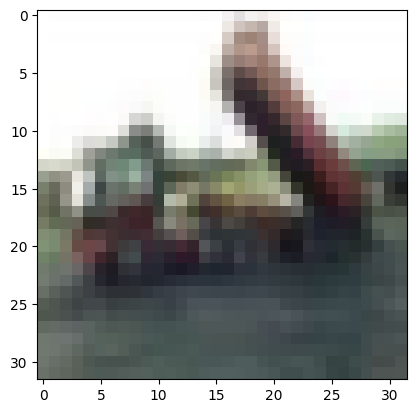

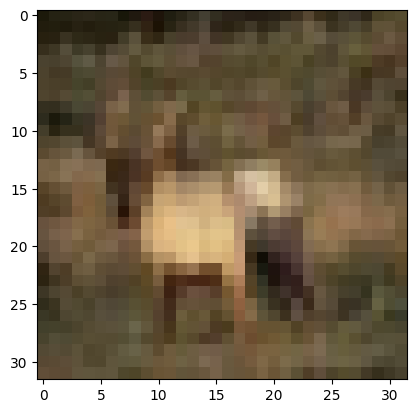

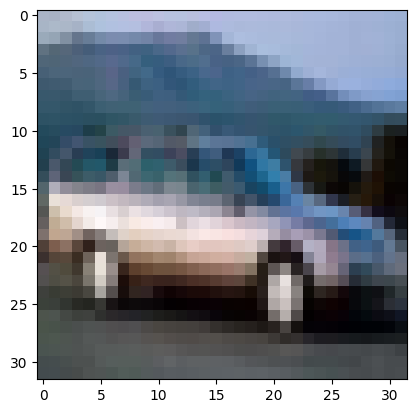

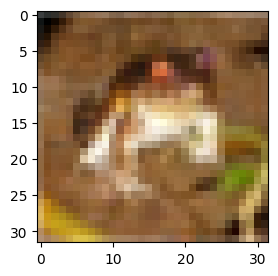

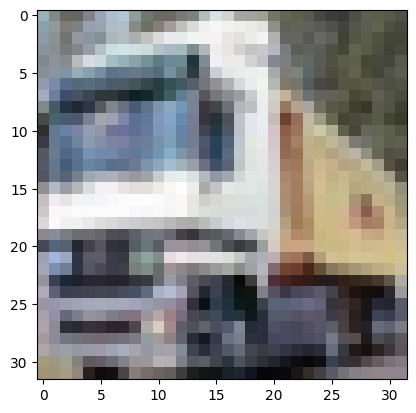

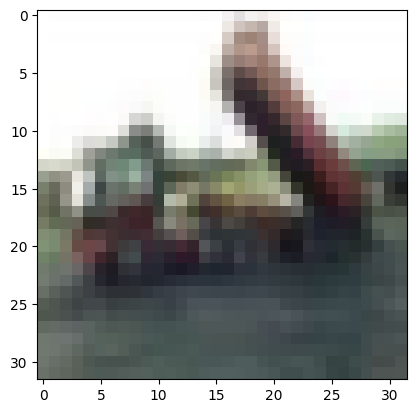

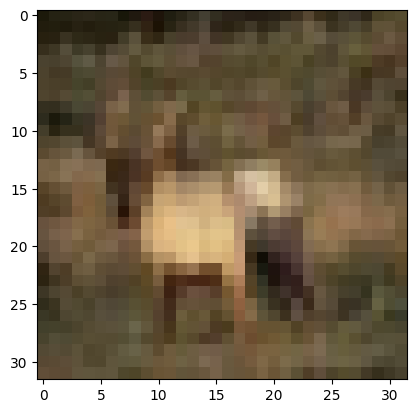

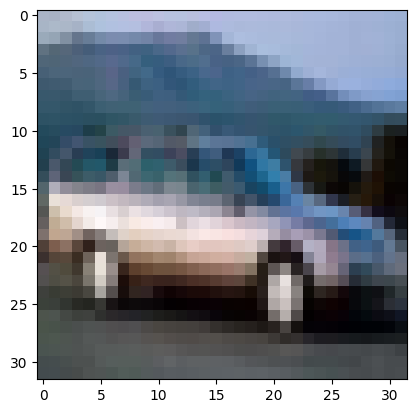

In [12]:
epochs=5
for epoch in range(epochs):
  img, label= trainset[epoch]
  img= torch.permute(img, (1,2,0))
  plt.imshow(img.numpy())
  plt.show()

In [13]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
class CIFAR10Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*8*8,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x




torch.manual_seed(42)
model0 = CIFAR10Model(input_shape=3,
    hidden_units=10,
    output_shape=len(classes)).to(device)

model0

CIFAR10Model(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

CIFAR10Model(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [15]:
def training(model, loss_fn, optimizer, train_loader):
  trainLoss = 0
  model.train()
  for imgs ,labels in train_loader:
    imgs, labels = imgs.to(device), labels.to(device)
    train_pred=model(imgs)
    loss= loss_fn(train_pred,labels)
    trainLoss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  trainLoss=trainLoss/len(trainloader)

  return trainLoss


In [16]:
def test(model, loss_fn , test_loader):
  testLoss=0
  total_acc=0
  model.eval()
  for imgs ,labels in test_loader:
    imgs, labels = imgs.to(device), labels.to(device)
    test_pred=model(imgs)
    loss= loss_fn(test_pred,labels)
    testLoss+=loss.item()
    acc=accuracy(test_pred,labels)
    total_acc+=acc
  total_acc=total_acc/len(test_loader)
  testLoss=testLoss/len(testloader)
  return testLoss, total_acc


In [45]:
def accuracy(pred,target):
  correct_count=0
  total_count = len(target)
  tensor=torch.eq(pred.argmax(dim=1), target)
  for t in tensor:
    if t ==True:
      correct_count+=1
  acc=(correct_count/total_count)*100
  return acc


In [17]:
epochs=20
model=model0
loss_fn=nn.CrossEntropyLoss()
params=model0.parameters()
optimizer=torch.optim.SGD(params, lr=0.1)
train_loader=trainloader
test_loader=testloader

for epoch in range(epochs):
  trainLoss= training(model, loss_fn, optimizer, train_loader)

  with torch.inference_mode():
    testLoss, total_acc = test(model, loss_fn, test_loader)
    if epoch%2==0:
      print(f"Epoch {epoch}/{epochs}, Train Loss: {trainLoss:.2f}, Test Loss: {testLoss:.2f}-----accuracy: {total_acc:.2f}%")



Epoch 0/100, Train Loss: 2.30, Test Loss: 2.30-----accuracy: 0.10%
Epoch 2/100, Train Loss: 2.30, Test Loss: 2.30-----accuracy: 0.11%
Epoch 4/100, Train Loss: 2.30, Test Loss: 2.30-----accuracy: 0.11%
Epoch 6/100, Train Loss: 2.30, Test Loss: 2.30-----accuracy: 0.13%
Epoch 8/100, Train Loss: 2.30, Test Loss: 2.30-----accuracy: 0.15%
Epoch 10/100, Train Loss: 2.27, Test Loss: 2.23-----accuracy: 0.17%


KeyboardInterrupt: 